#  Matching Catalogs by Proximity with NumCosmo

---
**License**

 Matching Catalogs by Proximity with NumCosmo

 Mon Dec 2 18:30:00 2024\
 Copyright  2024\
 Cinthia Nunes de Lima <cinthia.n.lima@uel.br> \ Sandro Dias Pinto Vitenti <vitenti@uel.br>

---
---
 matching_by_proximity\
 Copyright (C) 2024 Cinthia Nunes de Lima <cinthia.n.lima@uel.br>, Sandro Dias Pinto Vitenti <vitenti@uel.br>

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

## Libraries & Configs

In [1]:
import math
import sys

import os
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table
import pandas as pd

sys.path.insert(0, "/global/homes/c/cinlima/gcrcatalogs-new/gcr-catalogs")
sys.path.insert(0, "/global/homes/c/cinlima/")
sys.path.insert(0, "/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/MachingCatalogs")


import GCRCatalogs
#Put nersc if using nersc
GCRCatalogs.set_root_dir_by_site("nersc")

print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)


from numcosmo_py import Nc, Ncm
Ncm.cfg_init()

import tqdm

# GCRCatalogs.get_available_catalog_names()


GCRCatalogs = 1.9.0 | GCR = 0.9.2


## Catalogs

In [2]:
#Cosmo DC2
cosmodc2= GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image')

#Cosmo DC2 + RedMaPPer
catalog_dc2_redmapper = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_redmapper_v0.8.1')

In [3]:
# Restrictions on richness, mass and redshift
min_richness = 5
min_halo_mass = 1e13 #Msun
redshift_max = 1.2

#cDC2 + RM data
quantities = catalog_dc2_redmapper.list_all_quantities()
cluster_quantities = [q for q in quantities if 'member' not in q]
member_quantities = [q for q in quantities if 'member' in q]
    
query = GCRCatalogs.GCRQuery('(richness > ' + str(min_richness) +')')
cluster_data = Table(catalog_dc2_redmapper.get_quantities(cluster_quantities, [query])) # cDC2 + RM cluster data
member_data = Table(catalog_dc2_redmapper.get_quantities(member_quantities)) # cDC2 + RM member data

#cDC2 data
quantities_wanted = ['redshift','halo_mass','halo_id','galaxy_id','ra','dec', 'is_central']
query = GCRCatalogs.GCRQuery('(halo_mass > ' + str(min_halo_mass) +') & (redshift < ' + str(redshift_max) +') & (is_central < ' + str(redshift_max) +') ')
truth_data = Table(cosmodc2.get_quantities(quantities_wanted, [query]))

In [4]:
truth_data[truth_data['is_central'] == True]

ra,halo_id,galaxy_id,halo_mass,is_central,dec,redshift
float64,int64,int64,float64,bool,float64,float64
49.6366034309591,4500151475,9437500128,16891355712901.41,True,-40.400894272468605,0.04818676962281132
50.957598308861314,7300151475,9437500172,74621860826501.4,True,-41.3447799174979,0.04825926322238838
51.00887984172898,13700151475,9437500288,33506664194163.383,True,-40.832338501224754,0.04554516035339984
50.57641425057562,1100151464,9437500798,17911434075583.098,True,-41.15855360868742,0.0643846735498792
50.77601162448169,18300151442,9437504902,13042641686354.93,True,-39.168679326038024,0.10736840205357634
50.60510200022939,36400151442,9437505130,48388878878287.33,True,-39.336294511446724,0.12743613052494784
49.50475455575477,43700151442,9437505232,69213477135143.664,True,-40.23977306100707,0.11375834498747261
51.070122482361214,52300151442,9437505371,62974036412214.086,True,-39.64548257286864,0.1259639067546261
50.36982165635327,1200151432,9437509536,34125997485791.55,True,-39.09754001831282,0.12775858760889358


In [5]:
cluster_data

ra_cen_2,dec_cen_1,dec,redshift,dec_cen_0,scaleval,ra_cen_3,p_cen_0,richness,redshift_err,dec_cen_3,p_cen_2,id_cen_2,redshift_true_cg,id_cen_1,id_cen_3,cluster_id,p_cen_3,id_cen_4,id_cen_0,maskfrac,p_cen_1,richness_err,ra_cen_0,ra,dec_cen_4,ra_cen_1,p_cen_4,dec_cen_2,ra_cen_4
float64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,int64,float32,int64,int64,int32,float32,int64,int64,float32,float32,float32,float64,float64,float64,float64,float32,float64,float64
52.50825021974284,-25.71783277825776,-25.717996124671657,0.5135129,-25.717996124671657,1.0001404,52.527338368381535,0.79138356,190.70665,0.0027861558,-25.72165959330821,0.00010373697,1312932494,0.51072353,1312932492,1312945763,10,1.5151493e-06,1313029113,1312945563,0.0,0.20851088,3.7469666,52.520436430812914,52.520436430812914,-25.727465056757442,52.519490104517175,3.0111536e-07,-25.716281990601974,52.51910078836549
56.94124732225573,-27.199286148618782,-27.20434071042304,0.5712697,-27.20434071042304,1.0005391,56.92348931320997,0.99996513,179.12813,0.0032183963,-27.20003879579277,1.8312696e-06,2000525108,0.5740297,2000524824,2000536980,18,5.984015e-08,2000536915,2000524808,0.0,3.297315e-05,3.6934361,56.920376528125075,56.920376528125075,-27.211258176404048,56.927010885055374,1.7345036e-08,-27.204497548758997,56.92602537669649
57.00496745151956,-26.718600369742887,-26.7172081871169,1.040338,-26.7172081871169,1.000476,56.98989225804766,0.93527913,124.02715,0.0065176566,-26.719138984756995,0.026989846,2002535403,1.0347759,2002535425,2002541935,24,0.0052658287,2002535397,2002535198,0.0,0.03203878,2.4172914,56.99849698116052,56.99849698116052,-26.72317780680594,57.0029430173563,0.00042643907,-26.707287415263906,56.999685738888104
58.57655423797249,-27.440237841615975,-27.429961828331713,0.63518524,-27.429961828331713,1.0015866,58.56448660673249,0.9958548,167.33603,0.0060331975,-27.44671248175573,0.0005243642,2000760010,0.6426174,2000760286,2000760140,30,1.3199483e-05,2000760130,2000759779,0.0,0.0036076254,3.6777163,58.56362402841767,58.56362402841767,-27.441554361218707,58.55617219161547,6.2297656e-10,-27.4342933293566,58.54795919291436
58.358819114610974,-26.866270557202213,-26.867687128773035,0.44230303,-26.867687128773035,1.0000473,58.35345231858996,0.7297119,111.9147,0.003674398,-26.864486047315793,0.008745701,2000292571,0.43919736,2000292501,2000292504,71,4.2903914e-05,2000292608,2000289335,0.0,0.2614682,3.366554,58.35519782866568,58.35519782866568,-26.873768459561727,58.34992458608299,3.132921e-05,-26.87437529777802,58.34775850906022
57.76312485832799,-28.13711378351597,-28.119101936484828,0.46697217,-28.119101936484828,1.0014223,57.77313021619973,0.99970347,104.439766,0.0035005552,-28.112182213542138,6.477703e-05,2000290930,0.4680865,2000290835,2000291009,73,5.2879543e-05,2000290977,2000290819,0.0,0.00017803152,2.9570596,57.76575707007693,57.76575707007693,-28.130550627706278,57.75748991205223,8.6784746e-07,-28.123262961841775,57.78520845355392
58.4977149963539,-27.01259056457905,-26.989676182075844,0.4413634,-26.989676182075844,1.0021384,58.50636920080823,0.99999905,103.49396,0.0036729097,-26.99741400320372,3.0540557e-09,2000286516,0.44349608,2000286723,2000286566,109,2.2677467e-09,2000286533,2000286447,0.0,9.2802935e-07,3.3524604,58.509466974185045,58.509466974185045,-27.003486551712935,58.48648688545692,1.5482234e-09,-27.00358318558357,58.49500042467478
54.48695011233644,-27.89888605332762,-27.896589555863095,1.0629631,-27.896589555863095,1.0017645,54.47973899232569,0.6544826,76.85877,0.0070620407,-27.890609698478475,0.0004447735,1940324810,1.0758829,1940324773,1940324997,116,4.1882024e-05,1940324995,1940324795,0.0,0.34501392,2.2175314,54.494027152041674,54.494027152041674,-27.89828451222208,54.496631285075914,1.6846216e-05,-27.90097379323573,54.498303753402574
58.13909799735227,-27.200526363363345,-27.199784884537003,1.037697,-27.199784884537003,1.00349,58.135413610969586,0.991116,75.89771,0.0069939015,-27.20713970237154,0.00

## Matching by Proximity

In [134]:
halo_data = truth_data[truth_data['is_central'] == True].to_pandas()
z1 = halo_data['redshift']
theta1= np.radians(halo_data['dec'])
phi1 = np.radians(halo_data['ra'])

z2 = cluster_data['redshift']
theta2 = cluster_data['dec']
phi2 = cluster_data['ra']


In [171]:
snn = Ncm.SphereNN()
cosmo = Nc.HICosmoDEXcdm()
dist = Nc.Distance.new(3.0)
dist.prepare(cosmo)

r_a = np.array([dist.comoving(cosmo, z) for z in z1])

snn.insert_array(r_a, theta1, phi1)
snn.rebuild()


ind = []
for i, (theta, phi, z) in tqdm.tqdm(
    enumerate(zip(theta2, phi2, z2)), total=len(theta2)
    ):
    r = dist.comoving(cosmo, z)
    indices = np.array(snn.knn_search(r, theta, phi, 5))
    

100%|██████████| 45081/45081 [00:06<00:00, 6766.34it/s]


In [147]:
selected_cluster_data = cluster_data.to_pandas()[['ra', 'dec', 'richness', 'redshift']].rename(columns={"ra": "ra_cluster", "dec": "dec_cluster", "redshift": "redshift_cluster"})


In [148]:
match_catalog = pd.merge(selected_cluster_data, halo_data.loc[ind].reset_index(drop=True))
match_catalog

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

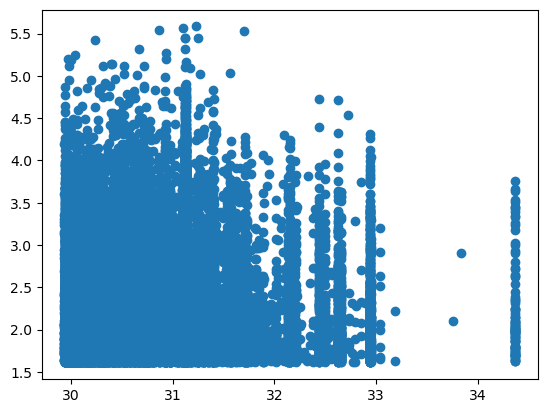

In [110]:
plt.scatter(np.log(match_catalog['halo_mass']), np.log(match_catalog['richness']))

In [124]:
cut = (match_catalog['ra'] - match_catalog['ra_cluster']) < 0.01

mt2 = match_catalog[np.abs(match_catalog['ra'] - match_catalog['ra_cluster']) < 0.01]

mt2[np.abs(match_catalog['dec'] - match_catalog['dec_cluster']) < 0.01]

/tmp/ipykernel_2234265/4053025566.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mt2[np.abs(match_catalog['dec'] - match_catalog['dec_cluster']) < 0.01]


,ra_cluster,dec_cluster,richness,redshift_cluster,ra,halo_id,galaxy_id,halo_mass,is_central,dec,redshift
1170,59.069095,-25.062746,5.068865,0.107252,59.069095,48900023453,1437502458,2.199955e+13,True,-25.062746,0.09216


In [85]:
example = pd.DataFrame({'col1': [1, 2, 3, 4], 'col2': [13, 14, 15, 16]})        

In [86]:
indices = [3, 1, 0]

In [87]:
example.loc[[3, 1, 0]]

,col1,col2
3,4,16
1,2,14
0,1,13


In [128]:
example2 = pd.DataFrame({'col3': [21, 22, 33, 24], 'col4': [113, 114, 115, 116]})  
pd.concat([example.loc[[3, 1, 0]].reset_index(drop=True), example2], axis=1)

,col1,col2,col3,col4
0,4.0,16.0,21,113
1,2.0,14.0,22,114
2,1.0,13.0,33,115
3,NaN,NaN,24,116
